In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual =[1,1,0,1,0,0,1,0,0,]
predicted =[1,0,0,1,0,0,1,1,1,0]
results = confusion_matrix(actual, predicted)
print(results)
print('Accuracy score:', accuracy_score(actual, predicted))
print('report :', classification_report(actual, predicted))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [5]:


data=pd.read_csv("weightheight.csv")


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


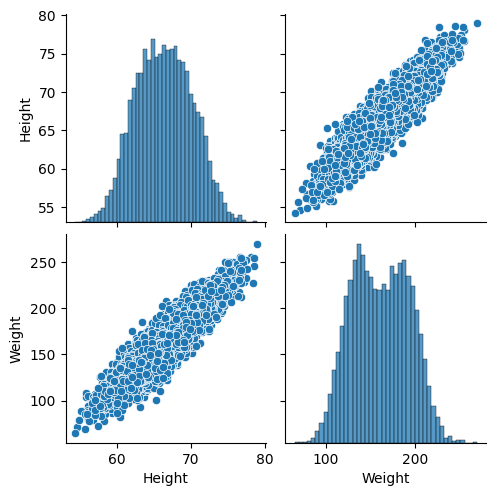

In [7]:
sns.pairplot(data)


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
gnd =pd.get_dummies(data['Gender'],drop_first=True)

In [17]:
gnd

,Male
0,True
1,True
2,True
3,True
4,True
...,...
9995,False
9996,False
9997,False
9998,False


In [18]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [20]:
data.drop('Gender',axis=1,inplace=True)

In [21]:
data=pd.concat([data,gnd],axis=1)

In [22]:
data.shape

(10000, 3)

In [26]:
x= data[['Height','Male']]
y=data['Weight']

In [27]:
# v= data[['Height','Female']]
# w= data['Weight']

In [28]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.22,random_state=2)

In [32]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
x_test.head()


,Height,Male
7878,61.068054,False
3224,63.012445,True
1919,70.404724,True
4432,68.775504,True
4835,67.076969,True


In [34]:
pred = lr.predict(x_test)

In [35]:
pred

array([120.08837443, 151.02173541, 195.23854059, ..., 116.43442459,
       126.8223831 , 136.08876401])

In [38]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:  7.988369931773569
MSE:  100.39586228244988
RMSE: 10.01977356442998


In [41]:
help()


Welcome to Python 3.11's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the internet at https://docs.python.org/3.11/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".


You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the help> prompt.


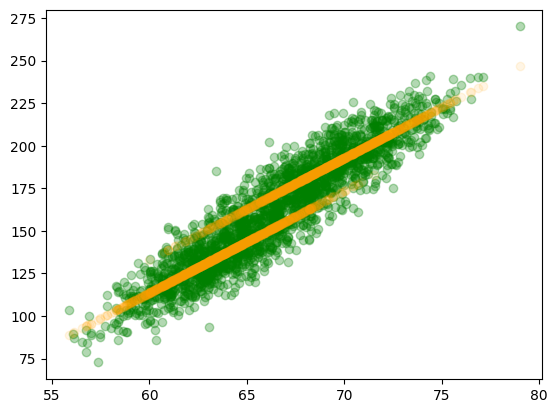

In [44]:
plt.scatter(x_test['Height'], y_test,color='green',alpha=0.3)
plt.scatter(x_test['Height'],pred,color='orange',alpha=0.1)

In [46]:
df2 =pd.DataFrame(columns=data.columns)

In [53]:
# df2= df2.drop('weight',axis=False)
df2.head()

,Height,Weight,Male


In [61]:
import pandas as pd

# Assuming df2 is your existing DataFrame
new_row = {'Height': 70.07874, 'Male': 0}
df2 = pd.concat([df2, pd.DataFrame([new_row])], ignore_index=True)

In [62]:
df2=df2.append({'Height':70.07874,'Male':0},ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [64]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a sample dataset (Iris dataset in this case)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Create a grid search object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Access feature coefficients (importance) from the best model
feature_importance = best_model.coef_[0]
print("Feature Importance:", feature_importance)

import joblib

# Save the model to a file
joblib.dump(best_model, 'logistic_regression_model.pkl')

# Load the model from a fileg
loaded_model = joblib.load('logistic_regression_model.pkl')

new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example new data
new_predictions = loaded_model.predict(new_data)
print("Predictions for new data:", new_predictions)


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Best Hyperparameters: {'C': 1}
Feature Importance: [-0.39738247  0.96040437 -2.37420257 -1.00295933]
Predictions for new data: [0]


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

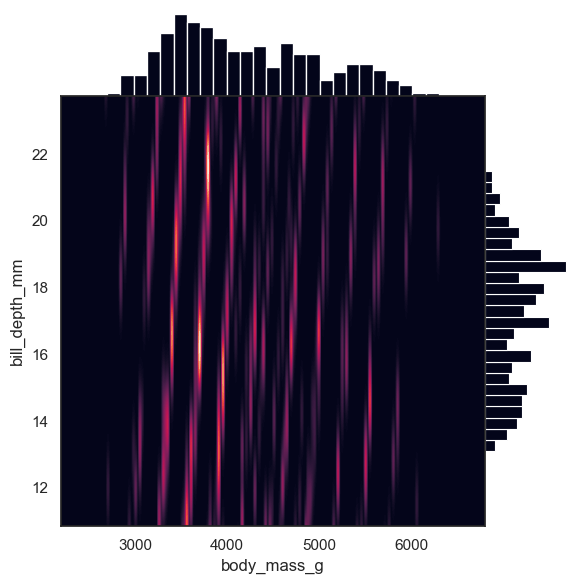

In [65]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [ ]:
lr=LinearRegression(asklhdviusgadivbjksabvjgsdj'a v 'jlasdv 
pas 
ipv
as varsip s
dv 
publish_display_datadipvi 
aspy 
as 
iv as\0dy\0 eyr0gy380gj
apiq gy a\s g]aer g\
    er g
a\ERASE TO THE RIGHTag9uas
DeprecationWarninggg
setgi
sudg
p 
ag
KeyErroru)